In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
#df = pd.read_csv("dataset/corrected") # training dataset
#df = pd.read_csv("dataset\kddcup.testdata.unlabeled_10_percent\kddcup.testdata.unlabeled_10_percent") # testing dataset
#df = pd.read_csv('dataset\kddcup.data\kddcup.data') # training dataset
df = pd.read_csv("dataset/Train_data.csv") # training dataset

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [43]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [44]:
# Get the count of null values in each column
null_counts = df.isnull().sum()

# Filter to display only columns with null values
columns_with_null = null_counts[null_counts > 0]

print(columns_with_null)

Series([], dtype: int64)


In [45]:
# those features are selected to make feature available during real time testing additional features can be added
selected_features = ['protocol_type', 'service', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 'class']

In [46]:
df_with_selected_features = df[selected_features]

In [47]:
df_with_selected_features.head()

,protocol_type,service,src_bytes,dst_bytes,count,srv_count,class
0,tcp,ftp_data,491,0,2,2,normal
1,udp,other,146,0,13,1,normal
2,tcp,private,0,0,123,6,anomaly
3,tcp,http,232,8153,5,5,normal
4,tcp,http,199,420,30,32,normal


In [48]:
df_with_selected_features['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [49]:
df_with_selected_features['service'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001'], dtype=object)

In [50]:
# Group by 'service' and count the number of occurrences for each unique value
service_counts = df_with_selected_features.groupby('service').size()

# # all value not displayed so saving them
# service_counts.to_csv('service_counts.csv', header=True)

In [51]:
df_with_selected_features['class'].unique()

array(['normal', 'anomaly'], dtype=object)

In [52]:
print('\n class distribution:')
print(df_with_selected_features['class'].value_counts())


 class distribution:
class
normal     13449
anomaly    11743
Name: count, dtype: int64


<Axes: xlabel='class', ylabel='count'>

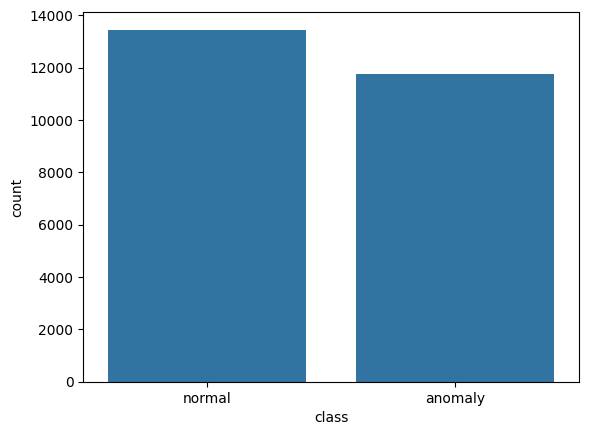

In [53]:
sns.countplot(x=df_with_selected_features['class'])

In [54]:
# using ordinal encoder instead of label encoder in order handel the unseen data during testing

from sklearn.preprocessing import OrdinalEncoder
import pickle

# Encoding all object columns and saving the encoders with unique names
for col in df_with_selected_features.columns:
    if df_with_selected_features[col].dtype == 'object':
        encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        df_with_selected_features[col] = encoder.fit_transform(df_with_selected_features[[col]])

        # Save the encoder to disk with the column name in the filename
        encoder_filename = f'model/{col}_encoder.pkl'
        with open(encoder_filename, 'wb') as file:
            pickle.dump(encoder, file)

C:\Users\Bipin Manandhar\AppData\Local\Temp\ipykernel_23272\100415516.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_selected_features[col] = encoder.fit_transform(df_with_selected_features[[col]])
C:\Users\Bipin Manandhar\AppData\Local\Temp\ipykernel_23272\100415516.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_selected_features[col] = encoder.fit_transform(df_with_selected_features[[col]])
C:\Users\Bipin Manandhar\AppData\Local\Temp\ipykernel_23272\100415516.py:10: SettingWith

In [55]:
df_with_selected_features.head()

,protocol_type,service,src_bytes,dst_bytes,count,srv_count,class
0,1.0,19.0,491,0,2,2,1.0
1,2.0,41.0,146,0,13,1,1.0
2,1.0,46.0,0,0,123,6,0.0
3,1.0,22.0,232,8153,5,5,1.0
4,1.0,22.0,199,420,30,32,1.0


In [56]:
df_with_selected_features.skew()

protocol_type      0.311258
service            0.477832
src_bytes        157.558542
dst_bytes         54.777576
count              1.503733
srv_count          4.707523
class             -0.135760
dtype: float64

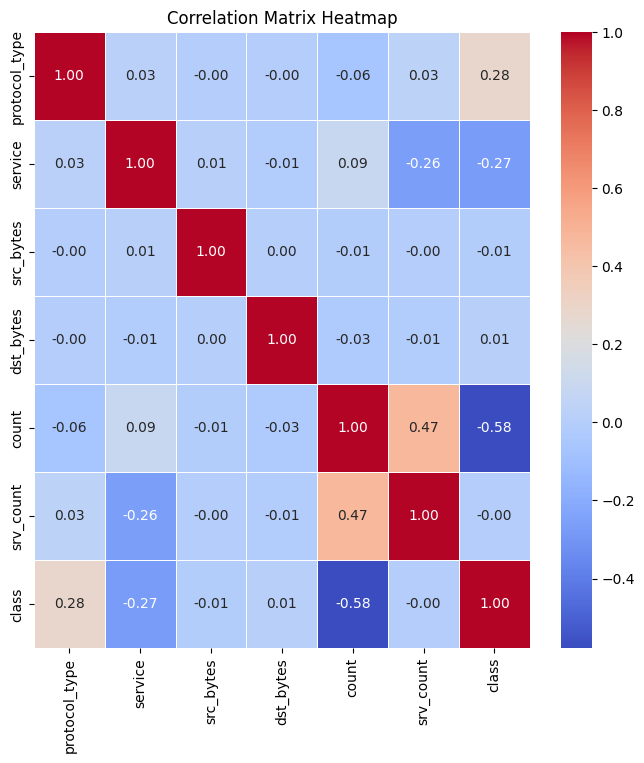

In [57]:
# Compute the correlation matrix for the remaining columns
corr_matrix = df_with_selected_features.corr()

# Plot the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

EDA

In [58]:
# print(f"\nEDA for: duration")
        
# # Descriptive Statistics
# print(df_with_selected_features['duration'].describe())

# # Plot histogram
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# sns.histplot(df_with_selected_features['duration'], kde=True, bins=30)
# plt.title(f'Histogram of duration')

# # Plot boxplot
# plt.subplot(1, 2, 2)
# sns.boxplot(df_with_selected_features['duration'])
# plt.title(f'Boxplot of duration')

# plt.show()

# print(f"\nHandling outliers for: duration")
        
# # Compute IQR for the log-transformed column
# Q1 = df_with_selected_features['duration'].quantile(0.25)
# Q3 = df_with_selected_features['duration'].quantile(0.75)
# IQR = Q3 - Q1

# # Define the lower and upper bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # # Option 1: Remove outliers
# # df_with_selected_features = df_with_selected_features[(df_with_selected_features['duration'] >= lower_bound) & (df_with_selected_features['duration'] <= upper_bound)]
# # Replace outliers with the lower and upper bounds as removing them resulted in single unique data
# df_with_selected_features['duration'] = df_with_selected_features['duration'].clip(lower=lower_bound, upper=upper_bound)

# # Plot log-transformed data after outlier removal
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# sns.histplot(df_with_selected_features['duration'], kde=True, bins=30)
# plt.title(f'Log-Transformed Histogram of duration after outlier removal')

# plt.subplot(1, 2, 2)
# sns.boxplot(x=df_with_selected_features['duration'])
# plt.title(f'Log-Transformed Boxplot of duration after outlier removal')

# plt.show()

# df_with_selected_features = df_with_selected_features.dropna()

In [59]:
# df_with_selected_features.isna().sum()

In [60]:
# df_with_selected_features.info()

In [61]:
# df_with_selected_features.skew()

In [62]:
# print(df_with_selected_features.nunique())



EDA for: src_bytes
count    2.519200e+04
mean     2.433063e+04
std      2.410805e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.400000e+01
75%      2.790000e+02
max      3.817091e+08
Name: src_bytes, dtype: float64


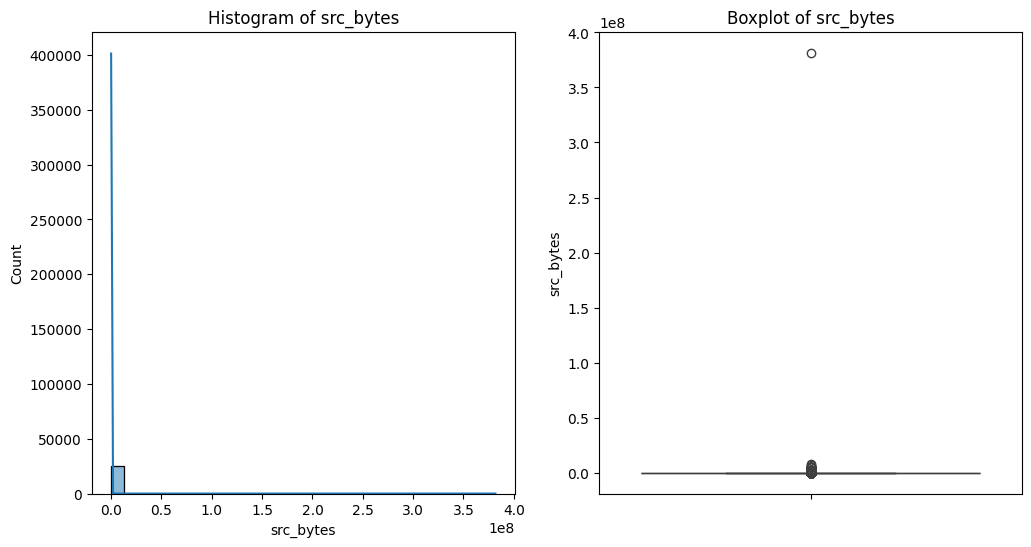


Handling outliers for: src_bytes by iqr


C:\Users\Bipin Manandhar\AppData\Local\Temp\ipykernel_23272\1549990757.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_selected_features['src_bytes'] = df_with_selected_features['src_bytes'].clip(lower=lower_bound, upper=upper_bound)


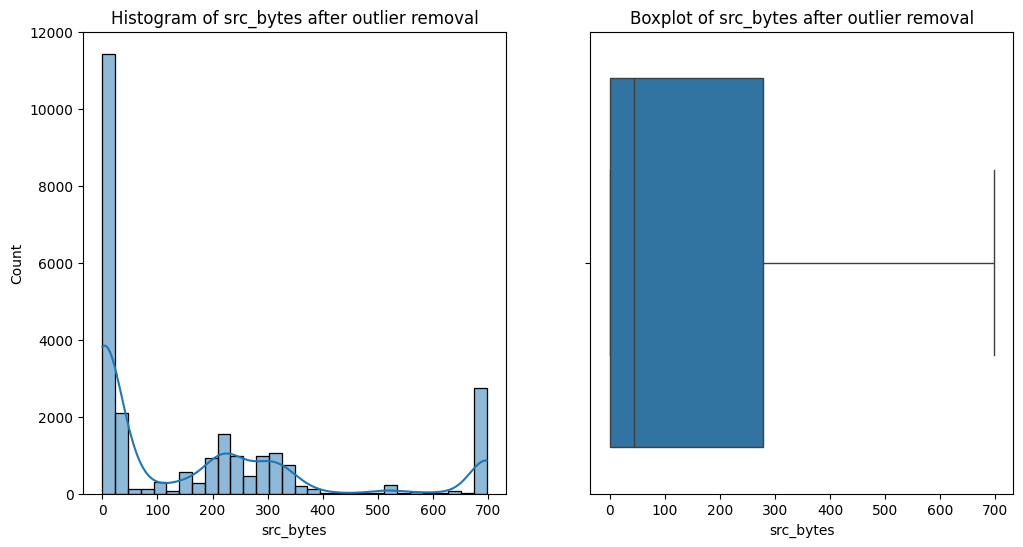

In [63]:
print(f"\nEDA for: src_bytes")
        
# Descriptive Statistics
print(df_with_selected_features['src_bytes'].describe())

# Plot histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_with_selected_features['src_bytes'], kde=True, bins=30)
plt.title(f'Histogram of src_bytes')

# Plot boxplot
plt.subplot(1, 2, 2)
sns.boxplot(df_with_selected_features['src_bytes'])
plt.title(f'Boxplot of src_bytes')

plt.show()

print(f"\nHandling outliers for: src_bytes by iqr")
        
# Compute IQR for the log-transformed column
Q1 = df_with_selected_features['src_bytes'].quantile(0.25)
Q3 = df_with_selected_features['src_bytes'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Option 1: Remove outliers
# df_with_selected_features = df_with_selected_features[(df_with_selected_features['src_bytes'] >= lower_bound) & (df_with_selected_features['src_bytes'] <= upper_bound)]
df_with_selected_features['src_bytes'] = df_with_selected_features['src_bytes'].clip(lower=lower_bound, upper=upper_bound)

# Plot log-transformed data after outlier removal
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_with_selected_features['src_bytes'], kde=True, bins=30)
plt.title(f'Histogram of src_bytes after outlier removal')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_with_selected_features['src_bytes'])
plt.title(f'Boxplot of src_bytes after outlier removal')

plt.show()

df_with_selected_features = df_with_selected_features.dropna()

In [64]:
df_with_selected_features.skew()

protocol_type     0.311258
service           0.477832
src_bytes         1.297644
dst_bytes        54.777576
count             1.503733
srv_count         4.707523
class            -0.135760
dtype: float64

In [65]:
df_with_selected_features.isna().sum()

protocol_type    0
service          0
src_bytes        0
dst_bytes        0
count            0
srv_count        0
class            0
dtype: int64

In [66]:
df_with_selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   protocol_type  25192 non-null  float64
 1   service        25192 non-null  float64
 2   src_bytes      25192 non-null  float64
 3   dst_bytes      25192 non-null  int64  
 4   count          25192 non-null  int64  
 5   srv_count      25192 non-null  int64  
 6   class          25192 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 1.3 MB


In [67]:
print(df_with_selected_features.nunique())


protocol_type       3
service            66
src_bytes         509
dst_bytes        3922
count             466
srv_count         414
class               2
dtype: int64



EDA for: dst_bytes
count    2.519200e+04
mean     3.491847e+03
std      8.883072e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.302500e+02
max      5.151385e+06
Name: dst_bytes, dtype: float64


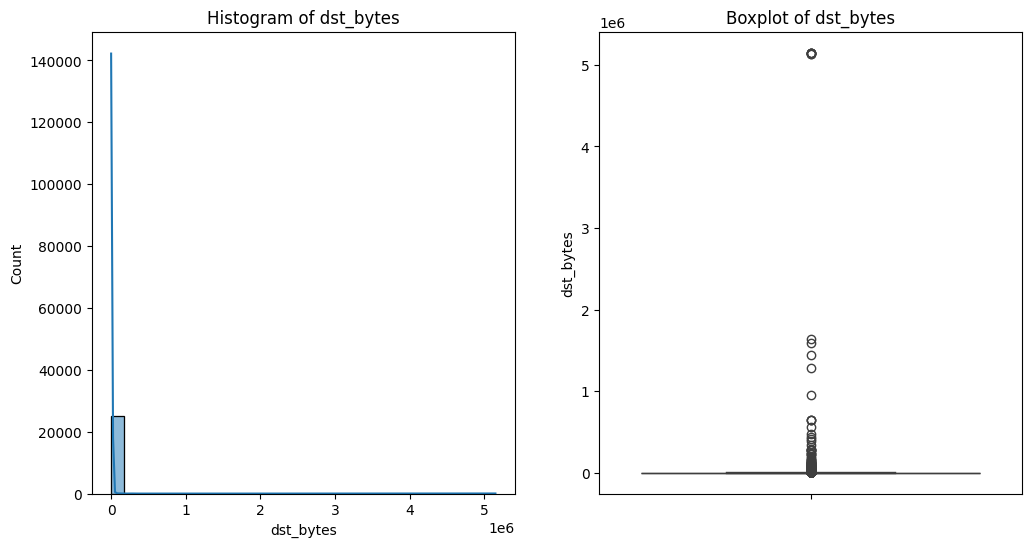


Handling outliers for: dst_bytes


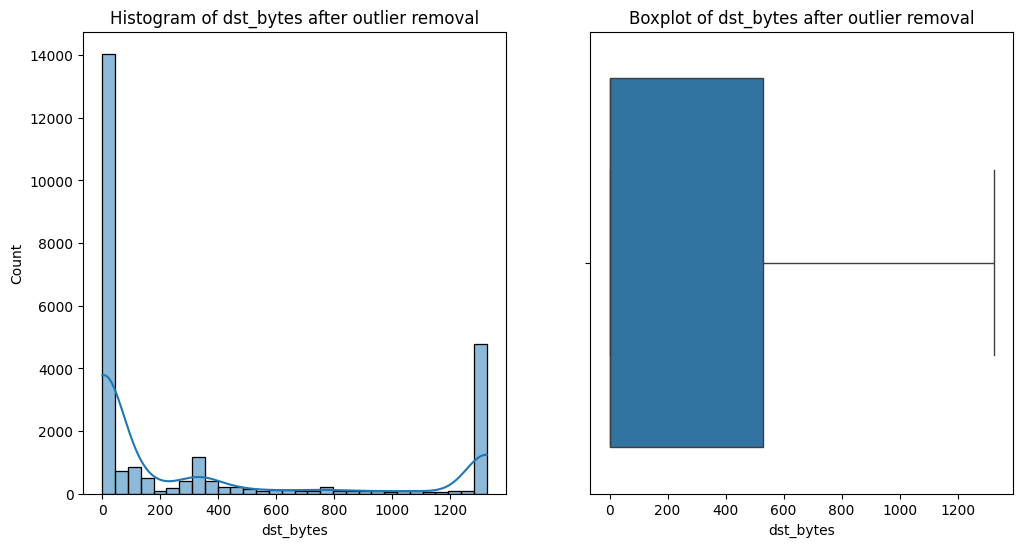

In [68]:
print(f"\nEDA for: dst_bytes")
        
# Descriptive Statistics
print(df_with_selected_features['dst_bytes'].describe())

# Plot histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_with_selected_features['dst_bytes'], kde=True, bins=30)
plt.title(f'Histogram of dst_bytes')

# Plot boxplot
plt.subplot(1, 2, 2)
sns.boxplot(df_with_selected_features['dst_bytes'])
plt.title(f'Boxplot of dst_bytes')

plt.show()


print(f"\nHandling outliers for: dst_bytes")
        
# Compute IQR for the log-transformed column
Q1 = df_with_selected_features['dst_bytes'].quantile(0.25)
Q3 = df_with_selected_features['dst_bytes'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Option 1: Remove outliers
# df_with_selected_features = df_with_selected_features[(df_with_selected_features['dst_bytes'] >= lower_bound) & (df_with_selected_features['dst_bytes'] <= upper_bound)]

df_with_selected_features['dst_bytes'] = df_with_selected_features['dst_bytes'].clip(lower=lower_bound, upper=upper_bound)

# Plot log-transformed data after outlier removal
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_with_selected_features['dst_bytes'], kde=True, bins=30)
plt.title(f'Histogram of dst_bytes after outlier removal')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_with_selected_features['dst_bytes'])
plt.title(f'Boxplot of dst_bytes after outlier removal')

plt.show()

df_with_selected_features = df_with_selected_features.dropna()

In [69]:
df_with_selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   protocol_type  25192 non-null  float64
 1   service        25192 non-null  float64
 2   src_bytes      25192 non-null  float64
 3   dst_bytes      25192 non-null  float64
 4   count          25192 non-null  int64  
 5   srv_count      25192 non-null  int64  
 6   class          25192 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 1.3 MB


In [70]:
df_with_selected_features.skew()

protocol_type    0.311258
service          0.477832
src_bytes        1.297644
dst_bytes        1.143498
count            1.503733
srv_count        4.707523
class           -0.135760
dtype: float64

In [71]:
print(df_with_selected_features.nunique())


protocol_type       3
service            66
src_bytes         509
dst_bytes        1058
count             466
srv_count         414
class               2
dtype: int64


# when outliers were removed using iqr - found single value for duration an dst_bytes
# when outliers were replaced with upper or lower bound - found single value for duration

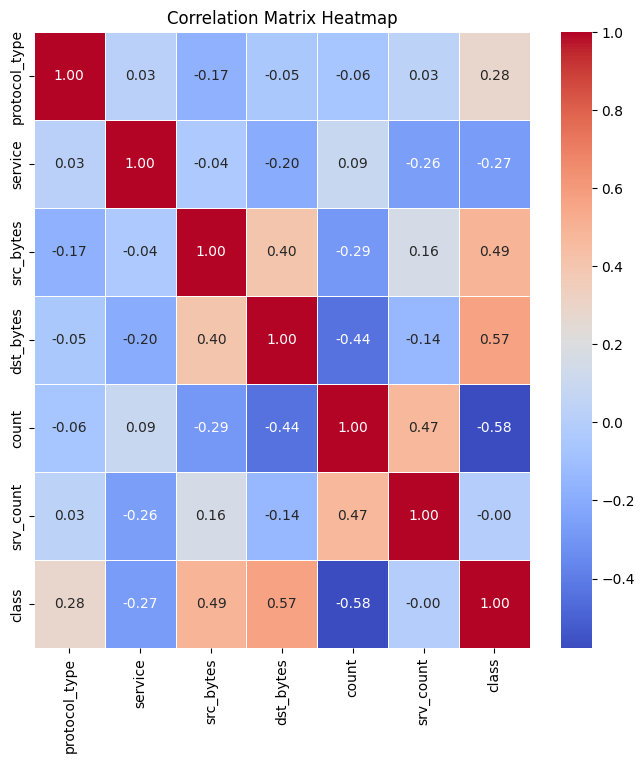

In [72]:
# Compute the correlation matrix for the remaining columns
corr_matrix = df_with_selected_features.corr()

# Plot the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [73]:
df_with_selected_features.head()

,protocol_type,service,src_bytes,dst_bytes,count,srv_count,class
0,1.0,19.0,491.0,0.000,2,2,1.0
1,2.0,41.0,146.0,0.000,13,1,1.0
2,1.0,46.0,0.0,0.000,123,6,0.0
3,1.0,22.0,232.0,1325.625,5,5,1.0
4,1.0,22.0,199.0,420.000,30,32,1.0


In [74]:
# numeric_columns = ['src_bytes_log', 'dst_bytes_log', 'count_log', 'srv_count_log'] # after performing log normalization
# for kdd
# numeric_columns = ['duration','src_bytes_log', 'dst_bytes_log', 'count', 'srv_count']
numeric_columns = ['src_bytes', 'count', 'srv_count', 'dst_bytes']
# numeric_columns = ['src_bytes', 'dst_bytes', 'count', 'srv_count']

In [75]:
# standardizing all numerica features so each feature contribute equally for classification
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_with_selected_features[numeric_columns])

# Convert the scaled data to a DataFrame with the same column names
df_scaled = pd.DataFrame(scaled_data, columns=numeric_columns)

# Replace the original columns with the scaled data
df_with_selected_features[numeric_columns] = df_scaled
# Save the encoder to a .pkl file
with open('model/standardization.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [76]:
df_with_selected_features.head()

,protocol_type,service,src_bytes,dst_bytes,count,srv_count,class
0,1.0,19.0,1.415223,-0.672625,-0.720244,-0.354628,1.0
1,2.0,41.0,-0.113860,-0.672625,-0.624317,-0.368427,1.0
2,1.0,46.0,-0.760950,-0.672625,0.334947,-0.299430,0.0
3,1.0,22.0,0.267303,1.867994,-0.694082,-0.313230,1.0
4,1.0,22.0,0.121043,0.132324,-0.476067,0.059355,1.0


In [77]:
df_with_selected_features.skew()

protocol_type    0.311258
service          0.477832
src_bytes        1.297644
dst_bytes        1.143498
count            1.503733
srv_count        4.707523
class           -0.135760
dtype: float64

In [78]:
df_with_selected_features = df_with_selected_features.sort_index(axis=1)
# sorted_final_df = df_with_selected_features.sort_index(axis=1)

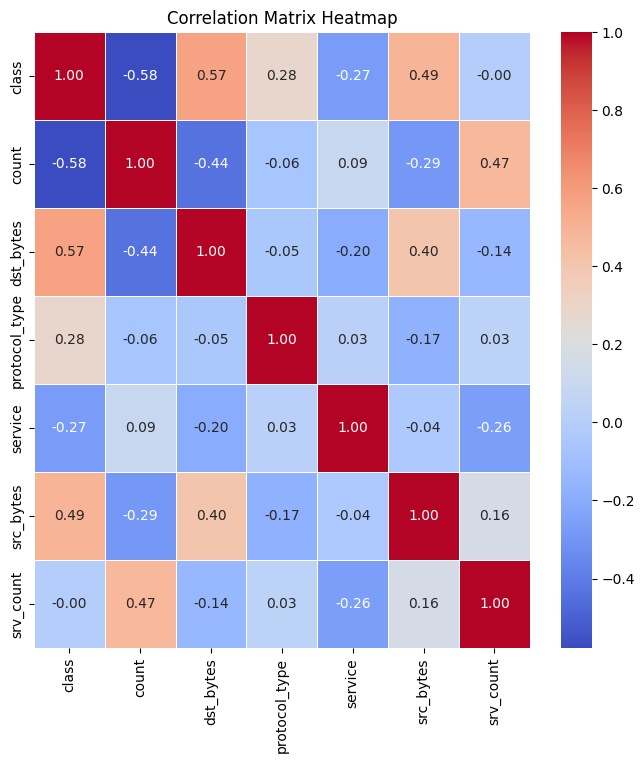

In [79]:
# Compute the correlation matrix for the remaining columns
corr_matrix = df_with_selected_features.corr()

# Plot the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [80]:
df_with_selected_features.to_csv('dataset/preprocessed_datas_kaggle_outlier_removed.csv', index=False)